In [1]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names('xtreme')
xtreme_subsets

['XNLI',
 'tydiqa',
 'SQuAD',
 'PAN-X.af',
 'PAN-X.ar',
 'PAN-X.bg',
 'PAN-X.bn',
 'PAN-X.de',
 'PAN-X.el',
 'PAN-X.en',
 'PAN-X.es',
 'PAN-X.et',
 'PAN-X.eu',
 'PAN-X.fa',
 'PAN-X.fi',
 'PAN-X.fr',
 'PAN-X.he',
 'PAN-X.hi',
 'PAN-X.hu',
 'PAN-X.id',
 'PAN-X.it',
 'PAN-X.ja',
 'PAN-X.jv',
 'PAN-X.ka',
 'PAN-X.kk',
 'PAN-X.ko',
 'PAN-X.ml',
 'PAN-X.mr',
 'PAN-X.ms',
 'PAN-X.my',
 'PAN-X.nl',
 'PAN-X.pt',
 'PAN-X.ru',
 'PAN-X.sw',
 'PAN-X.ta',
 'PAN-X.te',
 'PAN-X.th',
 'PAN-X.tl',
 'PAN-X.tr',
 'PAN-X.ur',
 'PAN-X.vi',
 'PAN-X.yo',
 'PAN-X.zh',
 'MLQA.ar.ar',
 'MLQA.ar.de',
 'MLQA.ar.vi',
 'MLQA.ar.zh',
 'MLQA.ar.en',
 'MLQA.ar.es',
 'MLQA.ar.hi',
 'MLQA.de.ar',
 'MLQA.de.de',
 'MLQA.de.vi',
 'MLQA.de.zh',
 'MLQA.de.en',
 'MLQA.de.es',
 'MLQA.de.hi',
 'MLQA.vi.ar',
 'MLQA.vi.de',
 'MLQA.vi.vi',
 'MLQA.vi.zh',
 'MLQA.vi.en',
 'MLQA.vi.es',
 'MLQA.vi.hi',
 'MLQA.zh.ar',
 'MLQA.zh.de',
 'MLQA.zh.vi',
 'MLQA.zh.zh',
 'MLQA.zh.en',
 'MLQA.zh.es',
 'MLQA.zh.hi',
 'MLQA.en.ar',
 'MLQA.en.de',


In [2]:
panx_subsets = [s for s in xtreme_subsets if s.startswith('PAN')]
panx_subsets

['PAN-X.af',
 'PAN-X.ar',
 'PAN-X.bg',
 'PAN-X.bn',
 'PAN-X.de',
 'PAN-X.el',
 'PAN-X.en',
 'PAN-X.es',
 'PAN-X.et',
 'PAN-X.eu',
 'PAN-X.fa',
 'PAN-X.fi',
 'PAN-X.fr',
 'PAN-X.he',
 'PAN-X.hi',
 'PAN-X.hu',
 'PAN-X.id',
 'PAN-X.it',
 'PAN-X.ja',
 'PAN-X.jv',
 'PAN-X.ka',
 'PAN-X.kk',
 'PAN-X.ko',
 'PAN-X.ml',
 'PAN-X.mr',
 'PAN-X.ms',
 'PAN-X.my',
 'PAN-X.nl',
 'PAN-X.pt',
 'PAN-X.ru',
 'PAN-X.sw',
 'PAN-X.ta',
 'PAN-X.te',
 'PAN-X.th',
 'PAN-X.tl',
 'PAN-X.tr',
 'PAN-X.ur',
 'PAN-X.vi',
 'PAN-X.yo',
 'PAN-X.zh']

In [3]:
from datasets import load_dataset

load_dataset('xtreme', name='PAN-X.de')

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [4]:
from collections import defaultdict
from datasets import DatasetDict

langs = ['de', 'fr', 'it', 'en']
fracs = [0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    ds = load_dataset('xtreme', name=f'PAN-X.{lang}')
    for set_name in ds:
        panx_ch[lang][set_name] = ds[set_name].shuffle(seed=0).select(range(int(frac * ds[set_name].num_rows)))

In [5]:
import pandas as pd

num_samples = pd.DataFrame({lang: [panx_ch[lang]['train'].num_rows] for lang in langs})
num_samples / num_samples.iloc[0].sum()

,de,fr,it,en
0,0.628372,0.228771,0.083916,0.058941


In [6]:
panx_ch['de']['train'][0]

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de']}

In [7]:
panx_ch['de']['train'].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [8]:
tags = panx_ch['de']['train'].features['ner_tags'].feature
tags
tags.int2str(5)

'B-LOC'

In [9]:
panx_de = panx_ch['de'].map(lambda batch: {'ner_tags_str': [tags.int2str(i) for i in batch['ner_tags']]})

In [10]:
panx_de

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 6290
    })
})

In [11]:
de_example = panx_de['train'][0]
pd.DataFrame(de_example)

,tokens,ner_tags,langs,ner_tags_str
0,2.000,0,de,O
1,Einwohnern,0,de,O
2,an,0,de,O
3,der,0,de,O
4,Danziger,5,de,B-LOC
5,Bucht,6,de,I-LOC
6,in,0,de,O
7,der,0,de,O
8,polnischen,5,de,B-LOC
9,Woiwodschaft,5,de,B-LOC


In [12]:
from collections import Counter

split2freqs = defaultdict(Counter)

for split, dataset in panx_de.items():
    for row in dataset['ner_tags_str']:
        row = [tag.split('-')[1] for tag in row if tag.startswith('B')]
        split2freqs[split] += Counter(row)

pd.DataFrame.from_dict(split2freqs, orient='index')

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [13]:
from transformers import AutoTokenizer

bert_model_name = 'bert-base-cased'
xlmr_model_name = 'xlm-roberta-base'

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

text = 'Jack Sparrow loves New York!'
xlmr_tokenizer(text)

{'input_ids': [0, 21763, 37456, 15555, 5161, 7, 2356, 5753, 38, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

pd.DataFrame([bert_tokens, xlmr_tokens])

,0,1,2,3,4,5,6,7,8,9
0,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
1,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


In [15]:
''.join(xlmr_tokens), ''.join(xlmr_tokens).replace(u'\u2581', ' ')

('<s>▁Jack▁Sparrow▁loves▁New▁York!</s>',
 '<s> Jack Sparrow loves New York!</s>')

In [16]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel


class XLMRForTC(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.roberta = RobertaModel(config, add_pooling_layer=False)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.roberta(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            **kwargs)
        # print(outputs)
        # print(outputs[0])
        seq_output = self.dropout(outputs[0])
        logits = self.classifier(seq_output)
        # print(logits.shape)

        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            # print(labels.shape)
            # print(logits.dtype, labels.dtype)
            loss = loss_fn(logits.view(-1, self.num_labels), labels.view(-1))

        return TokenClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions)


In [17]:
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [18]:
index2tag = {i: t for i, t in enumerate(tags.names)}
tag2index = {t: i for i, t in enumerate(tags.names)}

In [19]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag,
                                         label2id=tag2index)

In [20]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xlmr_model = XLMRForTC.from_pretrained(xlmr_model_name, config=xlmr_config).to(device)

Some weights of XLMRForTC were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
input_ids = xlmr_tokenizer(text)
input_ids

{'input_ids': [0, 21763, 37456, 15555, 5161, 7, 2356, 5753, 38, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [22]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
pd.DataFrame([xlmr_tokens, input_ids.numpy()[0]])

,0,1,2,3,4,5,6,7,8,9
0,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
1,0,21763,37456,15555,5161,7,2356,5753,38,2


In [23]:
outputs = xlmr_model(input_ids.to(device), labels=torch.ones(1, 10, dtype=torch.long).to(device))
predictions = torch.argmax(outputs.logits, dim=-1)
preds = [index2tag[i] for i in predictions.to('cpu').numpy()[0]]
pd.DataFrame([xlmr_tokens, preds])

,0,1,2,3,4,5,6,7,8,9
0,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
1,O,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,O


In [24]:
def tag_text(text, tags, model, tokenizer):
    tokens = tokenizer(text).tokens()
    input_ids = tokenizer(text, return_tensors="pt").input_ids.to(device)
    outputs = model(input_ids)
    predictions = torch.argmax(outputs.logits, dim=-1)
    preds = [tags.names[i] for i in predictions.to('cpu').numpy()[0]]
    return pd.DataFrame([tokens, preds])


tag_text(text, tags, xlmr_model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9
0,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
1,O,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,B-LOC,O


In [25]:
import random


def xlmr_tags(raw_tags, word_ids):
    tags = []
    word_id_prev = None
    for word_id in word_ids:
        if word_id is None or word_id == word_id_prev:
            tags.append(-100)
        else:
            tags.append(raw_tags[word_id])
        word_id_prev = word_id
    return tags


def tokenize_xlmr(batch):
    xlmr_tokens = xlmr_tokenizer(batch['tokens'], truncation=True, is_split_into_words=True)

    labels = []
    for i, raw_tags in enumerate(batch['ner_tags']):
        labels.append(xlmr_tags(raw_tags, xlmr_tokens.word_ids(i)))
    xlmr_tokens['labels'] = labels

    return xlmr_tokens


panx_de_encoded = panx_ch['de'].map(tokenize_xlmr, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

random_i = random.randint(0, panx_de_encoded['train'].shape[0])
x1 = panx_de_encoded['train']['input_ids'][random_i]
y1 = panx_de_encoded['train']['labels'][random_i]

In [26]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs


def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])


# hide_output
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

x2 = panx_de_encoded['train']['input_ids'][random_i]
y2 = panx_de_encoded['train']['labels'][random_i]

pd.DataFrame([x1, x2, y1, y2])

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1112,347,653,47649,5486,542,114796,6460,6,5,2
1,0,1112,347,653,47649,5486,542,114796,6460,6,5,2
2,-100,0,0,0,-100,-100,0,3,-100,0,-100,-100
3,-100,0,0,0,-100,-100,0,3,-100,0,-100,-100


In [27]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2


In [28]:
import numpy as np


def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=-1)

    batch_size, seq_len = preds.shape
    preds_batch = []
    labels_batch = []

    for i in range(batch_size):
        preds_i = []
        labels_i = []
        for j in range(seq_len):
            if label_ids[i, j] != -100:
                preds_i.append(index2tag[preds[i, j]])
                labels_i.append(index2tag[label_ids[i, j]])
        preds_batch.append(preds_i)
        labels_batch.append(labels_i)

    return preds_batch, labels_batch

In [29]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded['train']) // batch_size
model_name = f'{xlmr_model_name}-finetuned-panx-de'
training_args = TrainingArguments(
    output_dir=model_name,
    log_level='error',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',
    save_steps=1e6,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True
)

In [30]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_hat, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {'f1': f1_score(y_true, y_hat)}

In [31]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [32]:
def model_init():
    return XLMRForTC.from_pretrained(xlmr_model_name, config=xlmr_config).to(device)

In [33]:
from transformers import Trainer

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    train_dataset=panx_de_encoded['train'],
    eval_dataset=panx_de_encoded['validation'],
    tokenizer=xlmr_tokenizer)


In [34]:
from huggingface_hub import HfApi, notebook_login

hf_api = HfApi()
hf_api.whoami()

# notebook_login()

{'type': 'user',
 'id': '637564a16f6b1e5a56fb1700',
 'name': 'ryli',
 'fullname': 'Ryan L',
 'email': 'ryliuk@gmail.com',
 'emailVerified': True,
 'canPay': False,
 'isPro': False,
 'periodEnd': None,
 'avatarUrl': '/avatars/b789e1bc7323e19f2a6fe805e807db0f.svg',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'notebook_home', 'role': 'write'}}}

In [35]:
trainer.train()
trainer.push_to_hub(commit_message='Training completed')

Epoch,Training Loss,Validation Loss


training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ryli/xlm-roberta-base-finetuned-panx-de/commit/112ecb95cc693f0fdecfacbcc41ae9eedf117e7d', commit_message='Training completed', commit_description='', oid='112ecb95cc693f0fdecfacbcc41ae9eedf117e7d', pr_url=None, pr_revision=None, pr_num=None)

In [36]:
pd.DataFrame(trainer.state.log_history)

,loss,learning_rate,epoch,step,eval_loss,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.2598,3.336508e-05,1.00,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.00,525,0.154029,0.826779,2.5580,2458.941,102.814,NaN,NaN,NaN,NaN,NaN
2,0.1302,1.673016e-05,2.00,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.00,1050,0.135740,0.844669,2.6810,2346.153,98.098,NaN,NaN,NaN,NaN,NaN
4,0.0809,9.523810e-08,2.99,1572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3.00,1575,0.135818,0.866708,2.6773,2349.348,98.232,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,3.00,1575,NaN,NaN,NaN,NaN,NaN,98.987,381.262,15.911,8.669708e+14,0.156784


In [37]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
1,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


In [38]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    features = [dict(zip(batch, row)) for row in zip(*batch.values())]
    batch = data_collator(features)
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        output = trainer.model(input_ids, attention_mask)
        y_hat = torch.argmax(output.logits, axis=-1).cpu().numpy()
    loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction='none')
    loss = loss.view(len(input_ids), -1).cpu().numpy()
    
    return {'loss': loss, 'predicted_label': y_hat}

In [39]:
valid_set = panx_de_encoded['validation']
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()
df.head()

Parameter 'function'=<function forward_pass_with_label at 0x708c9bdaa700> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


,input_ids,attention_mask,labels,loss,predicted_label
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[-100, 3, -100, 4, 4, 4, -100]","[0.0, 0.0076513086, 0.0, 0.012611753, 0.007540...","[4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, ..."
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, -100, -100, -100, -100, 3, -100, -10...","[0.0, 0.00018273115, 0.0, 0.0, 0.0, 0.0, 1.560...","[6, 0, 0, 0, 0, 0, 5, 6, 6, 6, 6, 6, 6, 6, 6, ..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 0, 3, -100, -100, 0, -100, 0, ...","[0.0, 0.00020096666, 0.00010263393, 0.00011932...","[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-100, 0, 0, 0, 5, -100, 0, 0, -100]","[0.0, 0.00022671037, 0.00019703354, 0.00018285...","[5, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, 0, 3, ...","[0.0, 0.00010108437, 9.500529e-05, 0.000106329...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ..."


In [40]:
index2tag[-100] = 'IGN'

df['input_tokens'] = df['input_ids'].apply(lambda ids: xlmr_tokenizer.convert_ids_to_tokens(ids))
for label_col in ['predicted_label', 'labels']:
    df[label_col] = df[label_col].apply(lambda label_ids: [index2tag[i] for i in label_ids])
for padded_col in ['loss', 'predicted_label']:
    df[padded_col] = df.apply(lambda row: row[padded_col][:len(row['input_ids'])], axis=1)

df.head()

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.0076513086, 0.0, 0.012611753, 0.007540...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"
1,"[0, 56530, 25216, 30121, 152385, 19229, 83982,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[IGN, O, IGN, IGN, IGN, IGN, B-ORG, IGN, IGN, ...","[0.0, 0.00018273115, 0.0, 0.0, 0.0, 0.0, 1.560...","[I-LOC, O, O, O, O, O, B-LOC, I-LOC, I-LOC, I-...","[<s>, ▁WE, ITE, RL, EIT, UNG, ▁Luz, ky, j, ▁a,..."
2,"[0, 159093, 165, 38506, 122, 153080, 29088, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, O, O, O, B-ORG, IGN, IGN, O, IGN, O, ...","[0.0, 0.00020096666, 0.00010263393, 0.00011932...","[O, O, O, O, O, B-ORG, O, O, O, O, O, O, O, O]","[<s>, ▁entdeckt, ▁und, ▁gehört, ▁der, ▁Spek, t..."
3,"[0, 16459, 242, 5106, 6, 198715, 5106, 242, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[IGN, O, O, O, B-LOC, IGN, O, O, IGN]","[0.0, 0.00022671037, 0.00019703354, 0.00018285...","[B-LOC, O, O, O, B-LOC, B-LOC, O, O, B-LOC]","[<s>, ▁**, ▁', ▁'', ▁, Bretagne, ▁'', ▁', </s>]"
4,"[0, 11022, 2315, 7418, 1079, 8186, 57242, 97, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[IGN, O, O, O, O, O, O, O, IGN, O, O, O, B-ORG...","[0.0, 0.00010108437, 9.500529e-05, 0.000106329...","[O, O, O, O, O, O, O, O, O, O, O, O, B-ORG, I-...","[<s>, ▁Nach, ▁einem, ▁Jahr, ▁bei, ▁diesem, ▁Ve..."


In [41]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)
df_tokens.head()

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE


In [42]:
(
    df_tokens.groupby('input_tokens')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)
    .sort_values(by='sum', ascending=False)
)

,count,mean,sum
input_tokens,,,
▁,6066,0.033427,202.77
▁in,989,0.126997,125.60
▁der,1388,0.083480,115.87
▁/,163,0.640307,104.37
▁von,808,0.123478,99.77
...,...,...,...
▁Brand,1,0.000000,0.00
▁Rouge,1,0.000000,0.00
▁Branco,1,0.000000,0.00


In [43]:
(
    df_tokens.groupby('labels')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)
    .sort_values(by='sum', ascending=False)
)

,count,mean,sum
labels,,,
I-ORG,3820,0.481353,1838.77
B-ORG,2683,0.629754,1689.63
O,43648,0.031341,1367.97
B-LOC,3172,0.309650,982.21
I-LOC,1462,0.570684,834.34
B-PER,2893,0.283761,820.92
I-PER,4139,0.193803,802.15


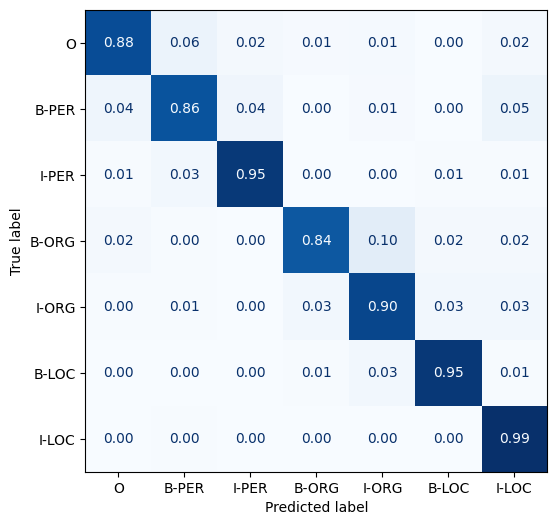

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(y_hat, y_true, labels):
    cm = confusion_matrix(y_true, y_hat, normalize='true')
    fix, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.show()

plot_confusion_matrix(df_tokens['labels'], df_tokens['predicted_label'], tags.names)

In [45]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row['attention_mask'][:-1]):
            if i > 0:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels, 
                               "preds": preds, "losses": losses})
        yield df_tmp

df['total_loss'] = df['loss'].apply(sum)
df_tmp = df.sort_values(by='total_loss', ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,tokens,labels,preds,losses
0,▁'',B-ORG,O,8.49
1,8,IGN,O,0.00
2,.,IGN,O,0.00
3,▁Juli,I-ORG,O,8.87
4,▁'',I-ORG,O,9.19
5,▁:,I-ORG,O,9.32
6,▁Protest,I-ORG,O,7.42
7,camp,IGN,O,0.00
8,▁auf,I-ORG,O,7.31
9,▁dem,I-ORG,O,9.26


,tokens,labels,preds,losses
0,▁',O,O,0.00
1,▁'',O,O,0.00
2,▁Τ,O,B-ORG,4.70
3,Κ,IGN,I-ORG,0.00
4,▁'',O,O,0.00
5,▁',O,O,0.00
6,▁',B-LOC,O,10.37
7,▁'',I-LOC,O,9.84
8,▁T,I-LOC,O,7.01
9,▁'',I-LOC,O,5.09


,tokens,labels,preds,losses
0,▁United,B-PER,B-ORG,5.68
1,▁Nations,I-PER,I-ORG,5.54
2,▁Multi,I-PER,I-ORG,5.72
3,dimensional,IGN,I-ORG,0.00
4,▁Integra,I-PER,I-ORG,5.67
5,ted,IGN,I-ORG,0.00
6,▁Stabil,I-PER,I-ORG,5.29
7,ization,IGN,I-ORG,0.00
8,▁Mission,I-PER,I-ORG,5.11
9,▁in,I-PER,I-ORG,4.87


In [47]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics['test_f1']

In [48]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
'[de] model on [de] dataset', f1_scores

('[de] model on [de] dataset',
 defaultdict(dict, {'de': {'de': 0.8702592550662289}}))

In [49]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
1,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [51]:
def evaluate_lan_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds['test'])

for ds_lang in ['fr', 'it', 'en']:
    f1_scores['de'][ds_lang] = evaluate_lan_performance(ds_lang, trainer)

f1_scores

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

defaultdict(dict,
            {'de': {'de': 0.8702592550662289,
              'fr': 0.7006780755569906,
              'it': 0.6898305084745763,
              'en': 0.5991041433370661}})

In [52]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset['train'].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset['validation']
    test_ds = dataset['test']
    training_args.logging_steps = len(train_ds) // batch_size
    
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
        train_dataset=train_ds,
        eval_dataset=valid_ds,
        tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message='Training completed')
    
    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {'num_samples': [num_samples],
         'f1_score': [f1_score]}
    )

panx_fr_encoded = encode_panx_dataset(panx_ch['fr'])

training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss


,num_samples,f1_score
0,250,0.318699


In [54]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = pd.concat(
        [metrics_df, train_on_subset(panx_fr_encoded, num_samples)],
        ignore_index=True
    )

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


In [55]:
metrics_df

,num_samples,f1_score
0,250,0.318699
1,500,0.686242
2,1000,0.756605
3,2000,0.806084
4,4000,0.841379


<Axes: xlabel='num_samples'>

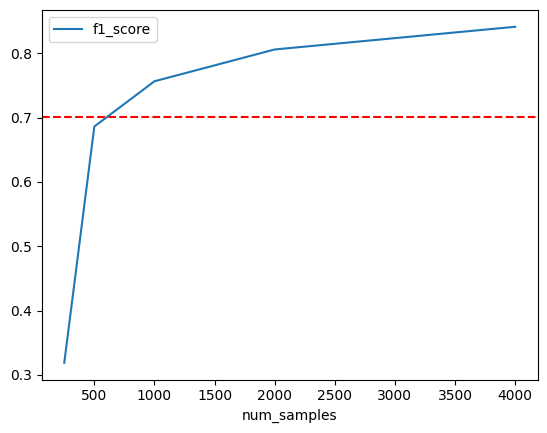

In [56]:
fig, ax = plt.subplots()
ax.axhline(f1_scores['de']['fr'], ls='--', color='r')
metrics_df.set_index('num_samples').plot(ax=ax)

In [60]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]
        ).shuffle(seed=42)
    return multi_corpus

panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

training_args.logging_steps = len(panx_de_fr_encoded['train']) // batch_size
training_args.push_to_hub = True
training_args.output_dir = 'xlm-roberta-base-finetuned-panx-de-fr'

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer,
    train_dataset=panx_de_fr_encoded['train'],
    eval_dataset=panx_de_fr_encoded['validation'])

trainer.train()
trainer.push_to_hub(commit_message='Training completed')

Epoch,Training Loss,Validation Loss


Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ryli/xlm-roberta-base-finetuned-panx-de-fr/commit/4f7964e4798ae2f0bd43cafdead685bb3752a130', commit_message='Training completed', commit_description='', oid='4f7964e4798ae2f0bd43cafdead685bb3752a130', pr_url=None, pr_revision=None, pr_num=None)

In [62]:
for lang in langs:
    f1 = evaluate_lan_performance(lang, trainer)
    print(f'[de+fr] model, [{lang} dataset]: {f1}')

[de+fr] model, [de dataset]: 0.8691720825091833


[de+fr] model, [fr dataset]: 0.8648387096774194


[de+fr] model, [it dataset]: 0.7944372012168622


[de+fr] model, [en dataset]: 0.6700680272108843


In [69]:
corpora = [panx_de_encoded]

for lang in langs[1:]:
    training_args.output_dir = f'xlm-roberta-base-finetuned-panx-{lang}'
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded['train'].num_rows)
    f1_scores[lang][lang] = metrics['f1_score'][0]
    corpora.append(ds_encoded)

Epoch,Training Loss,Validation Loss


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch,Training Loss,Validation Loss


tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

In [70]:
f1_scores

defaultdict(dict,
            {'de': {'de': 0.8702592550662289,
              'fr': 0.7006780755569906,
              'it': 0.6898305084745763,
              'en': 0.5991041433370661},
             'fr': {'fr': 0.847794707297514},
             'it': {'it': 0.8092386655260907},
             'en': {'en': 0.7149587750294464}})

In [71]:
corpora_encoded = concatenate_splits(corpora)

training_args.logging_steps = len(corpora_encoded['train']) // batch_size
training_args.output_dir = 'xlm-roberta-base-finetuned-panx-all'

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer,
    train_dataset=corpora_encoded['train'],
    eval_dataset=corpora_encoded['validation'])

trainer.train()
trainer.push_to_hub(commit_message='Training completed')

Epoch,Training Loss,Validation Loss


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ryli/xlm-roberta-base-finetuned-panx-all/commit/eb9b47bdfe6d0bdfe9382eb04cdaf6c62fdbb841', commit_message='Training completed', commit_description='', oid='eb9b47bdfe6d0bdfe9382eb04cdaf6c62fdbb841', pr_url=None, pr_revision=None, pr_num=None)

In [72]:
for idx, lang in enumerate(langs):
    f1_scores['all'][lang] = get_f1_score(trainer, corpora[idx]['test'])

scores_data = {'de': f1_scores['de'],
               'each': {lang: f1_scores[lang][lang] for lang in langs},
               'all': f1_scores['all']}
f1_scores_df = pd.DataFrame(scores_data)
f1_scores_df.rename_axis(index='Evaluated on', columns='Fine-tuned on', inplace=True)
f1_scores_df

Fine-tuned on,de,each,all
Evaluated on,,,
de,0.870259,0.870259,0.866994
fr,0.700678,0.847795,0.865450
it,0.689831,0.809239,0.863259
en,0.599104,0.714959,0.754873
